In [2]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable
from torchviz import make_dot

import sklearn.datasets as skdata


import torchvision
import torchvision.transforms as transforms





%matplotlib inline

In [3]:
torch.manual_seed(1)

In [4]:
iris= skdata.load_iris()

In [5]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

create a 1D tensor -1,1 with 100 breaks 

In [6]:
x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)

create a 1D tensor **y** by applying a function to x

In [7]:
y = x.pow(2) + 0.2*torch.rand(x.size())

In [8]:
y.size()

torch.Size([100, 1])

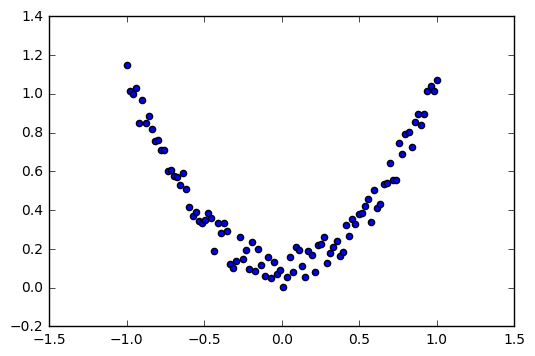

In [9]:
plt.scatter(x.data.numpy(),y.data.numpy())

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [40]:
input_size = 1
hidden_size = 10
output_size=1
num_epochs = 5
batch_size = 20
learning_rate = 0.01


In [29]:
train_loader = torch.utils.data.DataLoader(dataset=x, 
                                           batch_size=batch_size, 
                                           shuffle=True)
len(train_loader)

5

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=x, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [41]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [42]:
model = NeuralNet(input_size, hidden_size, output_size).to(device)
model

NeuralNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

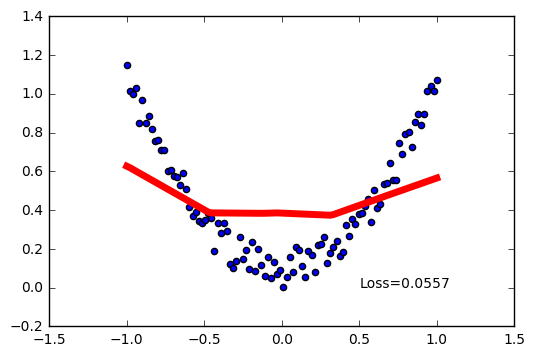

In [48]:
for t in range(200):
    
    #forward pass
    prediction = model(x)
    
    loss = loss_func(prediction, y)
    
    #backward and optimize
    
    #refresh gradients
    optimizer.zero_grad()
    #backpropagation
    loss.backward()
    #apply gradients
    optimizer.step()
    
    if t%5 == 0 :
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f'% loss.data.numpy())
        plt.pause(0.1)